# A Comprehensive Analysis of NBA Player Salaries


## Introduction

This project analyzes the factors that determine NBA player salaries during the 2024-2025 season, investigating how statistics, age, and position influence compensation. We focus particularly on the extreme salary disparity caused by superstar players who earn vastly more than average players. To understand which performance metrics teams value most, we compare traditional box score statistics against advanced all-in-one metrics. Our analysis employs multiple modeling approaches including Ordinary Least Squares regression as a baseline, Ridge and LASSO regression to handle correlated predictors, and Random Forest to capture non-linear patterns. By combining regularized linear models with ensemble methods, we provide a comprehensive examination of salary determinants in professional basketball. Ultimately, this research aims to reveal what truly drives NBA salary decisions and whether teams prioritize traditional stats or advanced analytics when compensating players.

## Data Description

Below is a snapshot of what our data looks like. As you can see, each player is assigned to a record where the player's game statistics and salaries are recorded. The features that we look at are a mix of traditional box score statistics (Games Played, Field Goals, etc.) in addition to advanced all-in-one metrics (PER, VORP, etc.). All the data is scraped from Basketball-Reference, a third-party site that houses NBA statistics across several seasons. 


We also perform some feature engineering to extract binary features based on various NBA Awards and whether a player is in their "Contract Year". A "Contract Year" means that a player is in the final year of their contract, therefore, the player will be motivated to play to the best of their ability to prove to the franchise that they are worthy of a new contract.

In [1]:
import pandas as pd
import os

data_path_2024 = os.getcwd()+'/data/final_2024_player.csv'
df = pd.read_csv(data_path_2024)
df.head()

,Rk_x,Player,Age,Team,Pos,G,GS,MP_x,FG,FGA,...,FirstTeam,SecondTeam,ThirdTeam,DefTeam1,DefTeam2,Salary,Guaranteed,2023-24_contract_year,Next_Year_Salary,Next_Year_Guaranteed
0,363.0,A.J. Green,24.0,MIL,SG,56.0,0.0,11.0,1.5,3.5,...,0,0,0,0,0,1901769,1901769,0,2120693,2120693
1,476.0,AJ Griffin,20.0,ATL,SF,20.0,0.0,8.6,0.9,3.1,...,0,0,0,0,0,3712920,7602840,0,250000,250000
2,109.0,Aaron Gordon,28.0,DEN,PF,73.0,73.0,31.5,5.5,9.8,...,0,0,0,0,0,22266182,46107637,0,22841455,112197227
3,278.0,Aaron Holiday,27.0,HOU,PG,78.0,1.0,16.3,2.4,5.3,...,0,0,0,0,0,2019706,0,1,4668000,4668000
4,136.0,Aaron Nesmith,24.0,IND,SF,72.0,47.0,27.7,4.4,8.8,...,0,0,0,0,0,5634257,38634257,0,11000000,33000000


## Exploratory Data Analysis

### NBA Salary Distribution

First, let's look into the distribution of NBA salaries. Getting a sense for how this is shaped is important for our later analysis and will help drive certain modeling and analysis choices made later. 

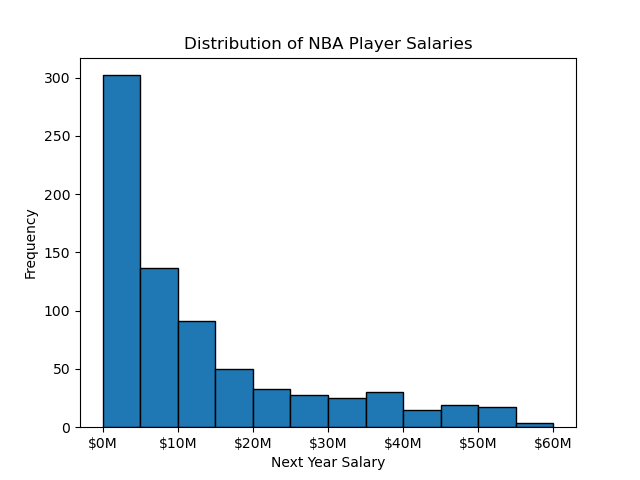

The distribution of NBA salaries is clearly right skewed. Most players earn below 10 million dollars. This makes sense, because there are very few "superstars" who are deserving of large salaries above 30 million, and majority of NBA players are role players or depth pieces that aren't expected to make much relative to others in their careers. Let's take a look into how NBA stats are related to NBA salaries

### Salary In Relation to Advanced Stats

Box Plus Minus (BPM) and Value Over Replacement Player (VORP) are two popular advanced stats metrics calculated for NBA players. BPM measures a player's contribution to their team's point differential per 100 possessions. VORP estimates how much added value a player brings to a team in comparison to an average "replacement player". Intuitively, one would expect that players with higher BPM or VORP metrics would have higher salaries, as better players should be paid more. Let's take a look at this relationship.

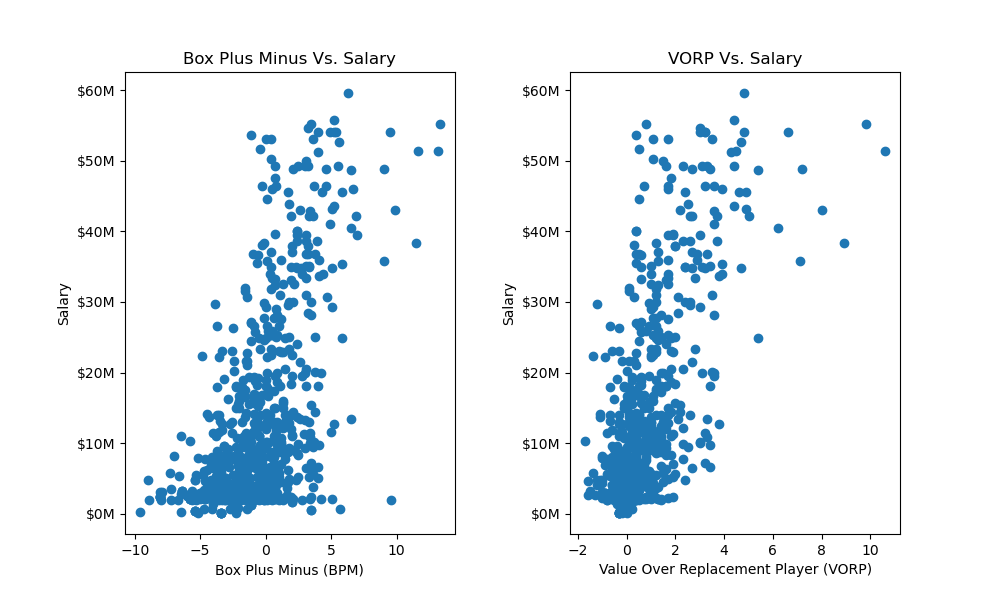

As expected, there is a moderately strong positive correlation between BPM and VORP and salaries. When calculating the correlation coefficients, VORP showed a slightly stronger correlation at around 0.67, while BPM had a correlation coefficient of 0.57.

### Offensive Metrics vs. Defensive Metrics and Their Impacts on Salaries

BPM and VORP combine offensive and defensive efficiency into one metric. As a result, they don't show whether offense or defense is more valued in evaluating a player's salary potential. Fortunately, BPM can be broken down into two other stats: Offensive Box Plus Minus (OBPM) and Defensive Box Plus Minus (DBPM). As their names suggest, they separate offensive and defensive performance from each other. By plotting these two against salaries, we can see if one has a stronger relationship with NBA salaries. 

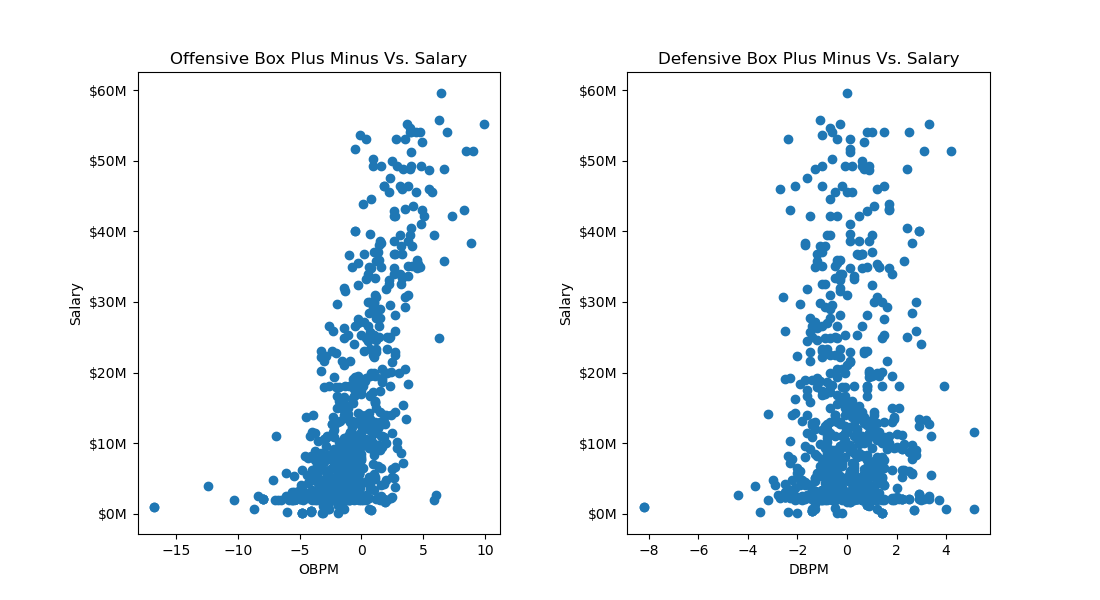

The correlation coefficient between OBPM and Salary is around 0.64, while the correlation coefficient between DBPM and Salary is around 0.06. As the plots and correlation coefficients show, there is a much stronger relationship between OBPM and Salary compared to that between DBPM and salary. An interpretation for this is that an offensively superior player could average expect to receive a higher salary than a defensively superior player. This is most probably because basketball, at its core, is a highly offensive sport, so a player being able to contribute more to their team's scoring would be highly valuable. 

### Salary vs. Age

An important relationship is that between salary and age. Younger players are typically on rookie contracts which are valued a lot lower than the average NBA salary. After a couple years of development and experience, NBA players typically reach their prime around their late twenties, so we can expect to see a mode around here. On the other hand, much older players towards the end of their careers are not as physically gifted anymore and are more valued for their basketball IQ and leadership. Yet, they are still paid a lot less than the average salary, because they don't contribute much to an offense.

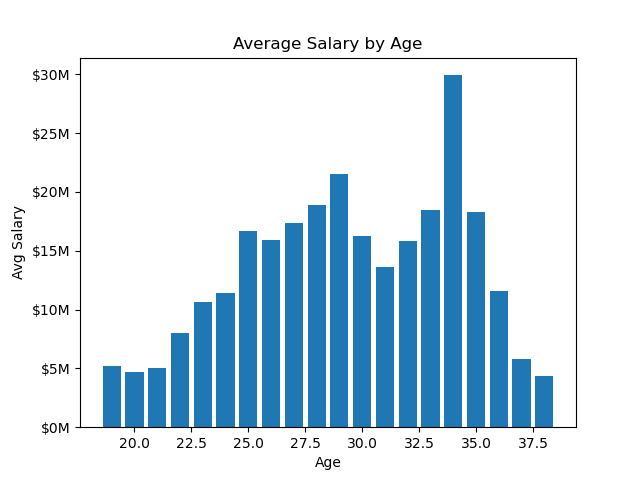

Suprisingly, players at age 34 show the highest average salary, while players at age 29 show the second highest average salary. However, players in their early to mid thirties are still physically able to produce at an elite level for teams. The only players to remain in the league at that age, however, are typically those who have been elite throughout their careers. As a result, it does make sense that they show such high average salaries. As expected, there is another mode for players in their late 20s, when they are typically in their primes. 

### Salary In Relation to Number of Awards

NBA awards are an easy way to distinguish elite players from average players. Intuitively, one would expect that players with any awards are better than players without any awards, and would expect to see higher salaries than their average counterparts.

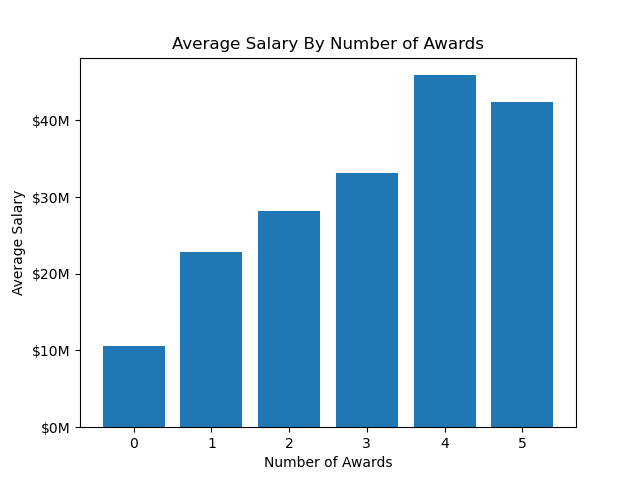

The plot follows exactly as we had thought. Players with more awards have a higher salary on average, as these awards are good ways to identify the best players in the league, who would obviously earn the highest salaries.

Another important accolade is all star selection. Each year, there are around 24 players selected for the All Star accolade. These are essentially the 24 best NBA players in a certain year. 

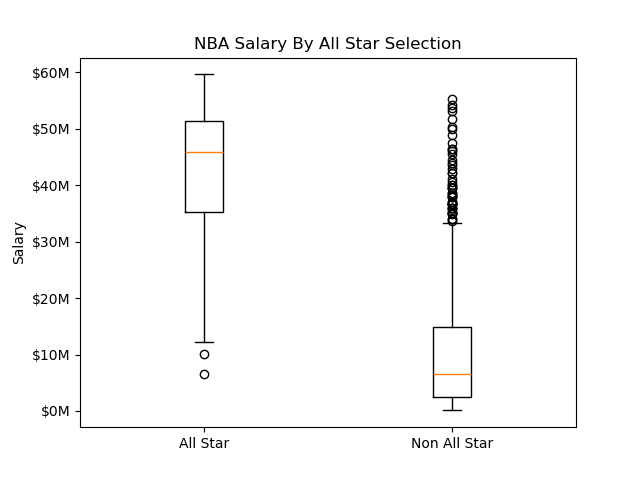

The side by side boxplot shows that All Star Players do earn much more than those who aren't. However, there are a lot of non All Star players as outliers who make about the same as All Star players. This is because All Star nominations are extremely selective, as there is only a certain amount of players each year who can be selected. As a result, there are many extremely talented players who are left off of the All Star roster. 

### Multicollinearity and VIF Analysis

After a thorough VIF analysis, we limit our dataset to the following columns: Age, MP_x, PF, TS%, TRB%, AST%, STL%, BLK%, TOV%, USG%, BPM, NumOfAwards, All-Star, AwardWinner, FirstTeam, SecondTeam, ThirdTeam, DefTeam1, DefTeam2. All of these columns have VIF scores lower than 10.

It's expected that there aren't many quantitative performance statistics, as most of these statistics are just linear combinations of other statistics, which is responsible for the data's original high VIF scores.

## Model Building and Evaluation

## Results and Conclusion

# Author Contributions
- **Brian Fernando:** Brian worked on scraping the data. Brian also worked on feature engineering, setting up yaml file. Brian also helped with main.ipynb notebook
- **Sharona Yang:** Sharona worked on the modeling section of the analysis. Sharona also helped put together the pdf files for the MyST site and worked on the main.ipynb file.
- **Aarush Maddela:** Aarush worked on the EDA section of the project, sifting through the data to find all the trends and insights. Aarush also generated plots and figures.
- **Nixon Tan:** Nixon worked on the Makefile and running the tests. Nixon also helped created the Myst site and helped with the ai-documentation and merging PRs.
